In [1]:
import json
from collections import defaultdict
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
import collections
import gzip
import calendar
import seaborn as sns
import dateutil.parser
import math
from tqdm import tqdm
from datetime import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/cse258/datasets

/content/drive/MyDrive/cse258/datasets


In [4]:
def get_date_time(timestamp):
  return datetime.fromtimestamp(timestamp).strftime("%m/%d/%Y, %H:%M:%S")

In [5]:
dataset = []
record_nu = 1000000
path = "movies.txt.gz"

tmp_di = {}
with gzip.open(path,'rt',encoding = "ISO-8859-1") as f:
  for line in tqdm(f):

    if line == '\n':
      record_nu -= 1
      dataset.append(tmp_di)
      tmp_di = {}
      continue


    line_li = line.strip().split(':')

    if line_li[0] == 'review/time':
      tmp_di[line_li[0]] = get_date_time(int(line_li[1]))
    else:
      tmp_di[line_li[0]] = "".join(line_li[1:])

    if record_nu == 0:
      break


len(dataset)

9000004it [00:50, 176590.28it/s]


1000000

In [6]:
df = pd.DataFrame(dataset)
print(df.shape)
df.head()

(1000000, 10)


,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,"I love my purple pigtails.""",...creative powers b...
0,B003AI2VGA,A141HP4LYPWMSR,"Brian E. Erland ""Rainbow Sphinx""",7/7,3.0,"06/25/2007, 00:00:00","""There Is So Much Darkness Now ~ Come For The...","Synopsis On the daily trek from Juarez, Mexic...",NaN,NaN
1,B003AI2VGA,A328S9RN3U5M68,Grady Harp,4/4,3.0,"06/16/2007, 00:00:00",Worthwhile and Important Story Hampered by Po...,THE VIRGIN OF JUAREZ is based on true events ...,NaN,NaN
2,B003AI2VGA,A1I7QGUDP043DG,"Chrissy K. McVay ""Writer""",8/10,5.0,"11/30/2006, 00:00:00",This movie needed to be made.,The scenes in this film can be very disquieti...,NaN,NaN
3,B003AI2VGA,A1M5405JH9THP9,golgotha.gov,1/1,3.0,"12/09/2007, 00:00:00",distantly based on a real tragedy,THE VIRGIN OF JUAREZ (2006)<br />directed by ...,NaN,NaN
4,B003AI2VGA,ATXL536YX71TR,"KerrLines ""&#34;Movies,Music,Theatre&#34;""",1/1,3.0,"08/29/2007, 00:00:00","""What's going on down in Juarez and shining a...","Informationally, this SHOWTIME original is es...",NaN,NaN


In [7]:
df = df.drop(df.columns[[8,9]], axis=1)
df.head()

,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B003AI2VGA,A141HP4LYPWMSR,"Brian E. Erland ""Rainbow Sphinx""",7/7,3.0,"06/25/2007, 00:00:00","""There Is So Much Darkness Now ~ Come For The...","Synopsis On the daily trek from Juarez, Mexic..."
1,B003AI2VGA,A328S9RN3U5M68,Grady Harp,4/4,3.0,"06/16/2007, 00:00:00",Worthwhile and Important Story Hampered by Po...,THE VIRGIN OF JUAREZ is based on true events ...
2,B003AI2VGA,A1I7QGUDP043DG,"Chrissy K. McVay ""Writer""",8/10,5.0,"11/30/2006, 00:00:00",This movie needed to be made.,The scenes in this film can be very disquieti...
3,B003AI2VGA,A1M5405JH9THP9,golgotha.gov,1/1,3.0,"12/09/2007, 00:00:00",distantly based on a real tragedy,THE VIRGIN OF JUAREZ (2006)<br />directed by ...
4,B003AI2VGA,ATXL536YX71TR,"KerrLines ""&#34;Movies,Music,Theatre&#34;""",1/1,3.0,"08/29/2007, 00:00:00","""What's going on down in Juarez and shining a...","Informationally, this SHOWTIME original is es..."


In [ ]:
# df.to_csv('movies.csv', header=True, index=False)

In [8]:
df.columns = ['productId', 'userId', 'profileName', 'helpfulness', 'score', 'time', 'summary', 'text']
df.head()


,productId,userId,profileName,helpfulness,score,time,summary,text
0,B003AI2VGA,A141HP4LYPWMSR,"Brian E. Erland ""Rainbow Sphinx""",7/7,3.0,"06/25/2007, 00:00:00","""There Is So Much Darkness Now ~ Come For The...","Synopsis On the daily trek from Juarez, Mexic..."
1,B003AI2VGA,A328S9RN3U5M68,Grady Harp,4/4,3.0,"06/16/2007, 00:00:00",Worthwhile and Important Story Hampered by Po...,THE VIRGIN OF JUAREZ is based on true events ...
2,B003AI2VGA,A1I7QGUDP043DG,"Chrissy K. McVay ""Writer""",8/10,5.0,"11/30/2006, 00:00:00",This movie needed to be made.,The scenes in this film can be very disquieti...
3,B003AI2VGA,A1M5405JH9THP9,golgotha.gov,1/1,3.0,"12/09/2007, 00:00:00",distantly based on a real tragedy,THE VIRGIN OF JUAREZ (2006)<br />directed by ...
4,B003AI2VGA,ATXL536YX71TR,"KerrLines ""&#34;Movies,Music,Theatre&#34;""",1/1,3.0,"08/29/2007, 00:00:00","""What's going on down in Juarez and shining a...","Informationally, this SHOWTIME original is es..."


In [9]:
df.isna().sum()

productId      0
userId         0
profileName    0
helpfulness    0
score          0
time           0
summary        0
text           0
dtype: int64

In [10]:
np.where(df.applymap(lambda x: x == ''))

(array([280693, 283112, 400215, 452880, 455032, 869727, 870022]),
 array([6, 6, 6, 6, 6, 6, 6]))

In [11]:
duplicate_rows = df[df.duplicated(subset=['userId', 'productId', 'score'], keep=False)]
duplicate_rows

,productId,userId,profileName,helpfulness,score,time,summary,text
136,B000063W1R,ADX5JX5LKLC22,Intro Spective,30/36,5.0,"01/18/2002, 00:00:00",BREATHTAKING...THEY JUST DON'T MAKE 'EM LIKE ...,"Like the previous reviewer, I too was fortuna..."
276,B000063W1R,ADX5JX5LKLC22,Intro Spective,0/1,5.0,"01/18/2002, 00:00:00",BREATHTAKING...THEY JUST DON'T MAKE 'EM LIKE ...,"Like the previous reviewer, I too was fortuna..."
409,B008FPU7AA,A1GGOC9PVDXW7Z,Annie Van Auken,1/1,4.0,"02/06/2011, 00:00:00","""The lights went out and I was knocked on the...","In ONE BODY TOO MANY, Bela Lugosi is amusing ..."
411,B008FPU7AA,A1GGOC9PVDXW7Z,Annie Van Auken,1/1,4.0,"09/10/2010, 00:00:00","Murkil ""Would you care for the last cup of co...","In ONE BODY TOO MANY, Bela Lugosi is amusing ..."
412,B008FPU7AA,A1GGOC9PVDXW7Z,Annie Van Auken,1/1,4.0,"09/10/2010, 00:00:00","Murkil ""Would you care for the last cup of co...",Niche market mfrs. such as A2ZCDS offer no co...
...,...,...,...,...,...,...,...,...
999820,B00005NRND,ALNVUO84IKSJ6,S. Baker,0/0,5.0,"09/06/2005, 00:00:00",Awesome Movie!,Best UMD I've watched to date! If your into m...
999821,B00005NRND,ALNVUO84IKSJ6,S. Baker,0/0,5.0,"09/06/2005, 00:00:00",Awesome Movie!,Best UMD I've watched to date! If your into m...
999860,B00005NRND,AOR4GK6YKDZEX,"Jennifer ""reader""",0/0,5.0,"06/19/2001, 00:00:00",A spectacular and stirring film!,"Crouching Tiger, Hidden Dragon centers around..."
999861,B00005NRND,AOR4GK6YKDZEX,"Jennifer ""reader""",0/0,5.0,"06/19/2001, 00:00:00",A spectacular and stirring film!,"Crouching Tiger, Hidden Dragon centers around..."


In [12]:
df = df.drop_duplicates(subset=['userId', 'productId', 'score'], keep='first')
df.shape

(991580, 8)

In [13]:
len(df['userId'].unique())

352169

In [14]:
len(df['productId'].unique())

31838

In [15]:
df['score'] = df['score'].astype(float)
df.describe()

,score
count,991580.000000
mean,4.087531
std,1.269052
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


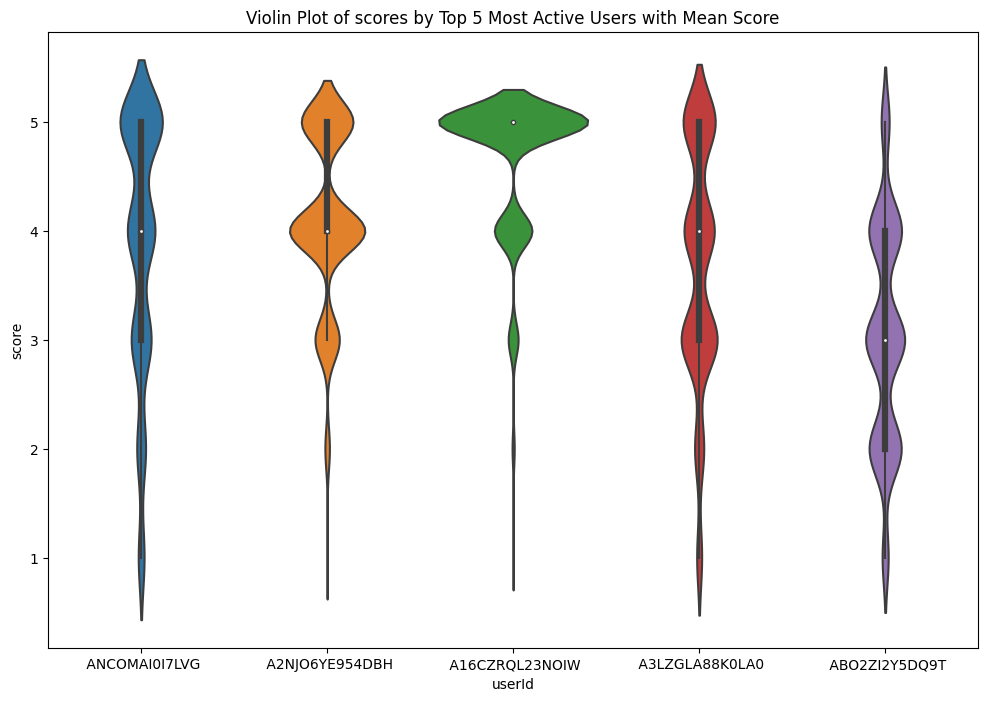

In [ ]:
user_activity = df.groupby('userId').agg({'score': ['count', 'mean']}).reset_index()
sorted_users = user_activity.sort_values(by=('score', 'count'), ascending=False)
top_5_users = sorted_users.head(5)['userId']
filtered_df = df[df['userId'].isin(top_5_users)]

plt.figure(figsize=(12, 8))
sns.violinplot(x='userId', y='score', data=filtered_df)
plt.title('Violin Plot of scores by Top 5 Most Active Users with Mean Score')
plt.show()


In [ ]:
sorted_users.head()

userId score          
                        count      mean
16318    A16CZRQL23NOIW  1307  4.677123
319440    ANCOMAI0I7LVG  1271  3.879622
242856   A3LZGLA88K0LA0  1268  3.670347
153689   A2NJO6YE954DBH  1102  4.114338
289116    ABO2ZI2Y5DQ9T  1037  3.037608

In [ ]:
df['time'] = pd.to_datetime(df['time'], format='%m/%d/%Y, %H:%M:%S')
df_copy = df.copy()
df2 = df_copy.sort_values(by='time')

In [ ]:
df2.set_index('time', inplace=True)
df2['time'] = df2.index

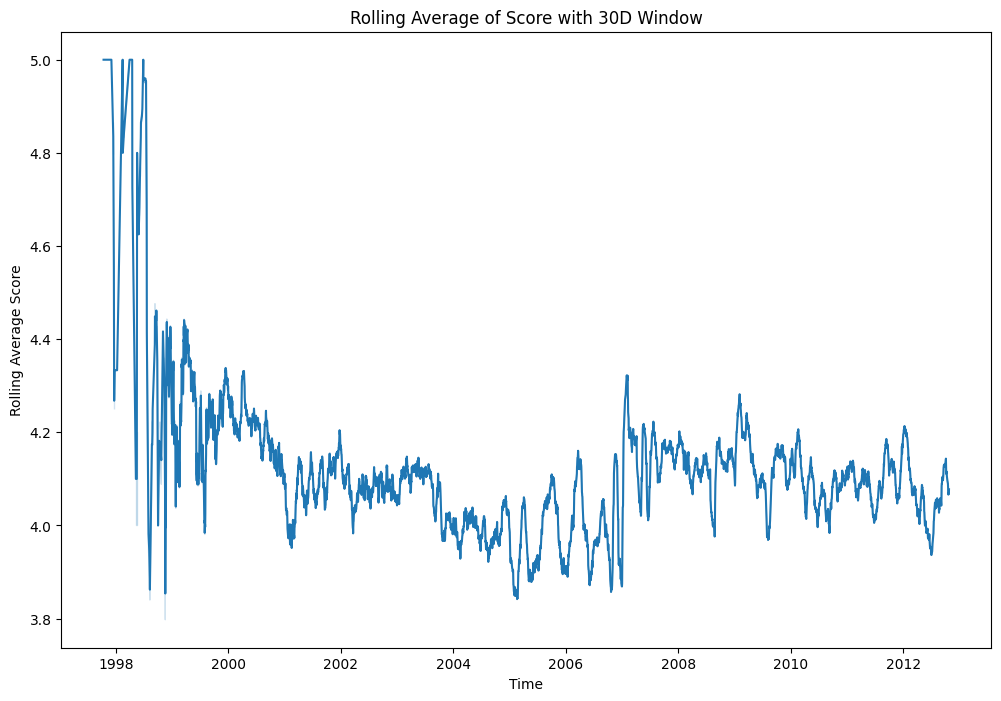

In [ ]:
# Calculate the rolling average of 'score' with a 7-day window
time_window = '30D'  # 7-day time window
df2['rolling_average'] = df2['score'].rolling(window=time_window).mean()

# Reset the index for plotting
# df2.reset_index(drop=True, inplace=True)

# Plot the rolling average with times
plt.figure(figsize=(12, 8))
sns.lineplot(x='time', y='rolling_average', data=df2)
plt.title(f'Rolling Average of Score with {time_window} Window')
plt.xlabel('Time')
plt.ylabel('Rolling Average Score')
plt.show()


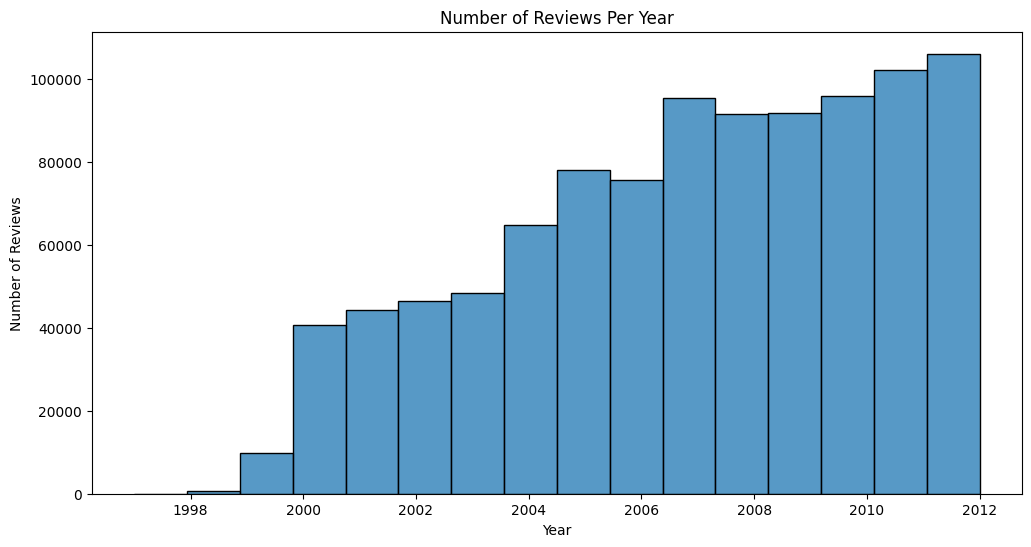

In [ ]:
df2['year'] = df2['time'].dt.year

# Histogram of the number of reviews per year
plt.figure(figsize=(12, 6))
sns.histplot(data=df2, x='year', bins=df2['year'].nunique(), kde=False)
plt.title('Number of Reviews Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

In [ ]:
df2['year_group'] = pd.cut(df2['year'], bins=[1996, 2000, 2004, 2008, 2012], labels=['1997-2000', '2001-04', '2005-08', '2008-12'])

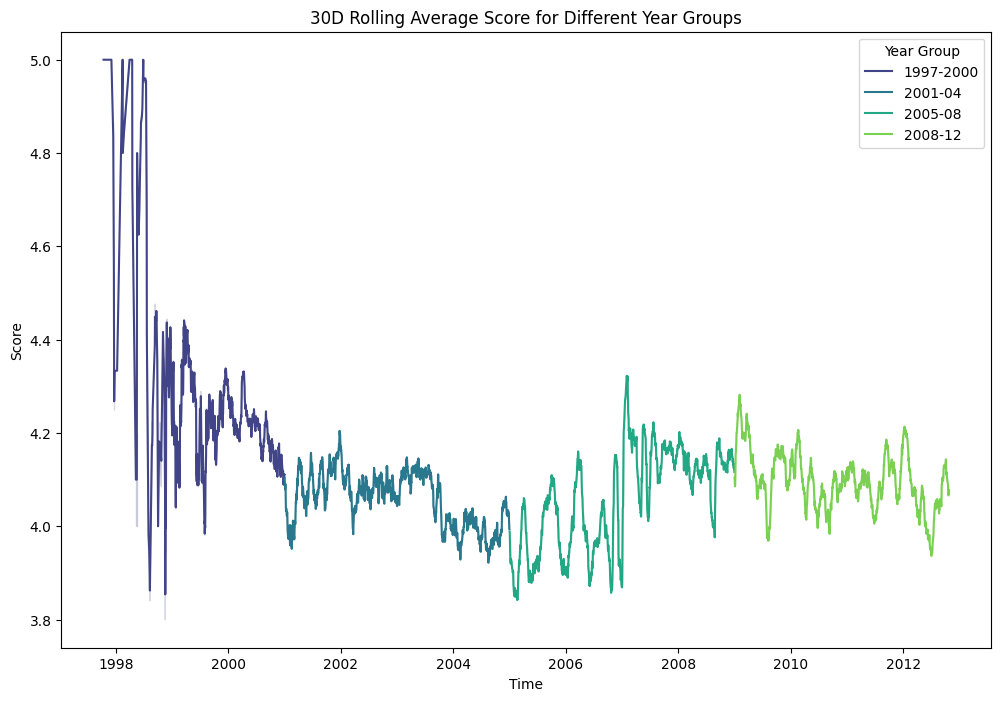

In [ ]:
# Plot rolling average ratings for different year groups
plt.figure(figsize=(12, 8))
sns.lineplot(x='time', y='rolling_average', hue='year_group', data=df2, palette='viridis')
plt.title(f'30D Rolling Average Score for Different Year Groups')
plt.xlabel('Time')
plt.ylabel('Score')
plt.legend(title='Year Group')
plt.show()

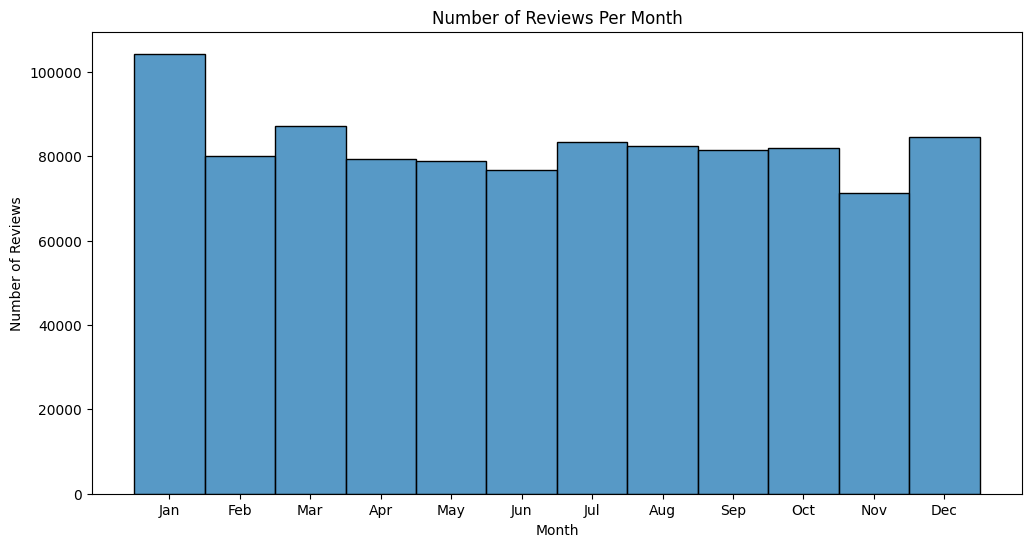

In [ ]:
df2['month'] = df2['time'].dt.month
df2['month_name'] = df2['month'].apply(lambda x: calendar.month_abbr[x])
month_order = [calendar.month_abbr[i] for i in range(1, 13)]
df2['month_name'] = pd.Categorical(df2['month_name'], categories=month_order, ordered=True)

# Plot histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=df2, x='month_name', bins=df2['month'].nunique(), kde=False)
plt.title('Number of Reviews Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()

<ipython-input-26-d13407ea3b83>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quarter['rolling_average2'] = df_quarter['score'].rolling(window=time_window).mean()
<ipython-input-26-d13407ea3b83>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quarter['rolling_average2'] = df_quarter['score'].rolling(window=time_window).mean()
<ipython-input-26-d13407ea3b83>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

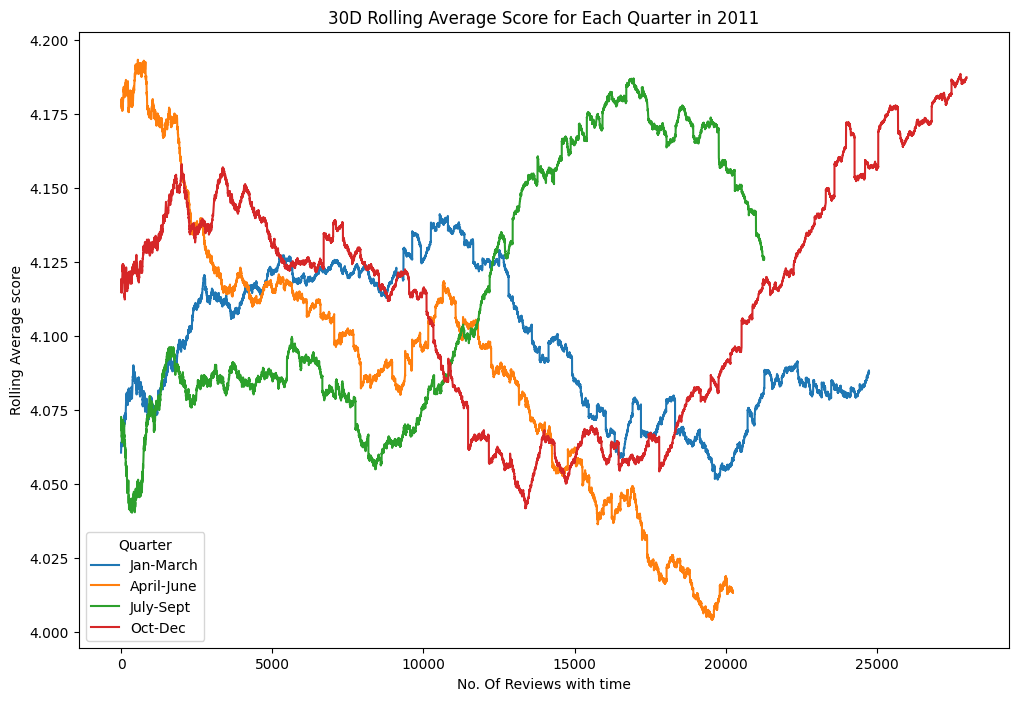

In [ ]:
# Set up the plot
plt.figure(figsize=(12, 8))
y = 2011
df_y = df2[df2['year'] == y]
time_window = '30D'
skip_days = 7
for quarter in range(1, 5):
    # Filter DataFrame for the specific quarter
    start_month = (quarter - 1) * 3 + 1
    end_month = quarter * 3
    df_quarter = df_y[(df_y['month'] >= start_month) & (df_y['month'] <= end_month)]
    df_quarter['rolling_average2'] = df_quarter['score'].rolling(window=time_window).mean()
    first_timestamp = df_quarter['time'].min()
    offset_timestamp = first_timestamp + pd.Timedelta(days=skip_days)
    df_quarter = df_quarter[df_quarter['time'] >= offset_timestamp]
    quarter_labels = ["Jan-March", "April-June", "July-Sept", "Oct-Dec"]

    # Calculate the rolling average for the quarter

    # Plot the rolling average for the quarter
    sns.lineplot(x=range(len(df_quarter)), y=df_quarter['rolling_average2'], label=quarter_labels[quarter-1])

# Set plot labels and legend
plt.title(f'{time_window} Rolling Average Score for Each Quarter in {y}')
plt.xlabel('No. Of Reviews with time')
plt.ylabel('Rolling Average score')
plt.legend(title='Quarter')
plt.show()

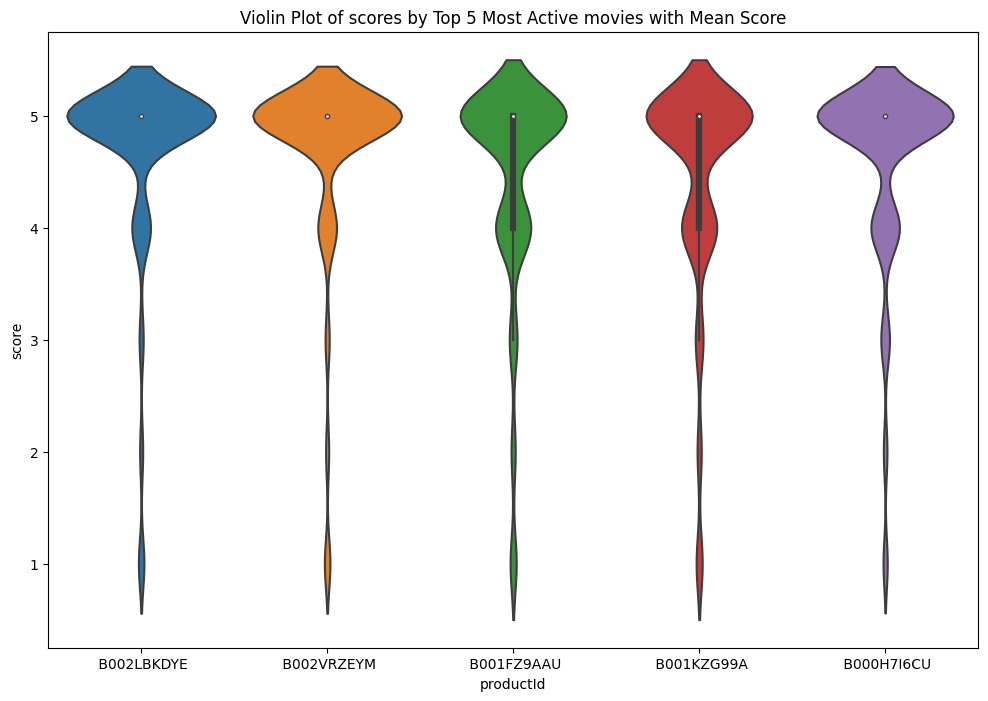

In [ ]:
movie_activity = df.groupby('productId').agg({'score': ['count', 'mean']}).reset_index()
sorted_movies = movie_activity.sort_values(by=('score', 'count'), ascending=False)
top_5_movies = sorted_movies.head(5)['productId']
filtered_df2 = df[df['productId'].isin(top_5_movies)]

plt.figure(figsize=(12, 8))
sns.violinplot(x='productId', y='score', data=filtered_df2)
plt.title('Violin Plot of scores by Top 5 Most Active movies with Mean Score')
plt.show()


In [ ]:
sorted_movies

productId score          
                   count      mean
23150   B001KZG99A   919  4.450490
22776   B001FZ9AAU   918  4.449891
17928   B000H7I6CU   901  4.593785
25545   B002VRZEYM   876  4.675799
24982   B002LBKDYE   876  4.675799
...            ...   ...       ...
21026   B000ZOT8JA     1  1.000000
26754   B003LN1DFE     1  5.000000
21028   B000ZPEXU8     1  1.000000
26751   B003LHZE3W     1  5.000000
27773   B0049IHX36     1  2.000000

[31838 rows x 3 columns]

In [ ]:
usersPerMovie = defaultdict(set) # Maps an item to the users who rated it
moviesPerUser = defaultdict(set) # Maps a user to the items that they rated
#movieNames = {}
ratingDict = {} # To retrieve a rating for a specific user/item pair

for d in df_collaborative:
    user,movie = d['userId'], d['productId']
    usersPerMovie[movie].add(user)
    moviesPerUser[user].add(movie)
    ratingDict[(user,movie)] = d['score']
    #movieNames[movie] = d['product_title']

NameError: ignored

# models

## Neural Collaborative Filtering (NCF)

In [16]:
pip install LibRecommender


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.8 MB/s eta 0:00:00


In [45]:

fm_df = df.copy()
fm_df = fm_df[['userId','productId', 'score', 'time']].infer_objects()
# .rename(columns={'userId':'user'}).rename(columns={'productId':'item'}).rename(columns={'score':'label'})
# ,'profileName', 'helpfulness','summary', 'text'

fm_df

,userId,productId,score,time
0,A141HP4LYPWMSR,B003AI2VGA,3.0,"06/25/2007, 00:00:00"
1,A328S9RN3U5M68,B003AI2VGA,3.0,"06/16/2007, 00:00:00"
2,A1I7QGUDP043DG,B003AI2VGA,5.0,"11/30/2006, 00:00:00"
3,A1M5405JH9THP9,B003AI2VGA,3.0,"12/09/2007, 00:00:00"
4,ATXL536YX71TR,B003AI2VGA,3.0,"08/29/2007, 00:00:00"
...,...,...,...,...
999995,A3KVOH2BWRI0WW,B00005NRND,5.0,"10/11/2001, 00:00:00"
999996,AZ7V5N45X1K4Z,B00005NRND,5.0,"03/11/2001, 00:00:00"
999997,A3D926XQ9UAAHT,B00005NRND,5.0,"06/14/2005, 00:00:00"
999998,A2SBGTE825H1N3,B00005NRND,4.0,"03/02/2002, 00:00:00"


In [46]:
fm_df[['userId','productId']] = fm_df[['userId','productId']]

In [47]:
fm_df

,userId,productId,score,time
0,A141HP4LYPWMSR,B003AI2VGA,3.0,"06/25/2007, 00:00:00"
1,A328S9RN3U5M68,B003AI2VGA,3.0,"06/16/2007, 00:00:00"
2,A1I7QGUDP043DG,B003AI2VGA,5.0,"11/30/2006, 00:00:00"
3,A1M5405JH9THP9,B003AI2VGA,3.0,"12/09/2007, 00:00:00"
4,ATXL536YX71TR,B003AI2VGA,3.0,"08/29/2007, 00:00:00"
...,...,...,...,...
999995,A3KVOH2BWRI0WW,B00005NRND,5.0,"10/11/2001, 00:00:00"
999996,AZ7V5N45X1K4Z,B00005NRND,5.0,"03/11/2001, 00:00:00"
999997,A3D926XQ9UAAHT,B00005NRND,5.0,"06/14/2005, 00:00:00"
999998,A2SBGTE825H1N3,B00005NRND,4.0,"03/02/2002, 00:00:00"


In [48]:
import numpy as np
import pandas as pd
from libreco.data import random_split, DatasetPure
from libreco.algorithms import NCF
from libreco.evaluation import evaluate
import torch


In [49]:
from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(fm_df, test_size=0.2, random_state=42)
eval_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)




In [50]:
# Rename columns to match the expected format
train_data.rename(columns={'userId': 'user', 'productId': 'item', 'score': 'label'}, inplace=True)
eval_data.rename(columns={'userId': 'user', 'productId': 'item', 'score': 'label'}, inplace=True)
test_data.rename(columns={'userId': 'user', 'productId': 'item', 'score': 'label'}, inplace=True)
train_data = train_data[['user','item','label']]
eval_data = eval_data[['user','item','label']]
test_data = test_data[['user','item','label']]
test_data


,user,item,label
786223,A299VMD4972EEO,B0008FXT6E,2.0
373528,A1FJXTO8P18EMQ,B000GW8RX4,5.0
620180,A3HQ5CWXZJXF8J,B0002WZTOI,5.0
449057,AKAYC3RVTG9I5,6304497156,1.0
797873,A112H6LPW6II9W,B0000V6S6E,5.0
...,...,...,...
778783,A1G0VFQ9198IUF,B0071HPOJW,5.0
216765,A2XLW4F7ETILS4,B0019RSPVE,2.0
617538,A3KCKMRUCEE1BA,B000063V8K,4.0
34460,AYUIQK0UN0446,B0014Z4OOI,5.0


In [51]:
train_data

,user,item,label
216604,ATKE5HUVSNBIU,B007USWCMY,4.0
457401,A3KSXHZF3X9EXI,B002A5C35I,4.0
169886,A2SU5JOGRFAUQW,B004J04KXU,4.0
72835,AG2H576UMJN5E,B002B7TQGO,5.0
115801,A3MSQL0L4DM98Q,B009OMYASS,2.0
...,...,...,...
261274,A1YC9XEDFKXPLK,B00158K1CI,4.0
368932,A2IW46KWNE5AWF,B00004TT6G,5.0
132975,AWG2O9C42XW5G,B00004RNEN,5.0
676757,A1WP71RZQ7FH3K,B006VYFB1C,5.0


In [52]:
eval_data

,user,item,label
224692,A1NNKD245F688Q,B00007M5HM,5.0
353985,A82LIVYSX6WZ9,B000065JDX,4.0
745985,A2JQVW9W2T99NB,B00009N84F,4.0
144458,ALGF51BNI0B9I,B0013AESMM,5.0
636061,A2Z4PLM3GTG9CY,B0045ASBLG,5.0
...,...,...,...
964991,APL0U45YCTCNH,B000O174CM,1.0
319621,A28SOLZ3W3HWEA,B00005OCMS,5.0
576264,A1MGMCLBON0TE0,B000NUXFYU,2.0
154938,A7OM80F804A1U,B00004CQYW,5.0


In [53]:
train_data = train_data.filter((train_data['user'].isin(data_info['user'])) & (train_data['item'].isin(data_info['item'])))


TypeError: ignored

In [42]:
train_data, data_info= DatasetPure.build_trainset(train_data)
eval_data = DatasetPure.build_evalset(eval_data)
test_data = DatasetPure.build_testset(test_data)

In [43]:
ncf = NCF(
    task="rating",
    data_info=data_info,
    loss_type="cross_entropy",
    embed_size=16,
    n_epochs=10,
    lr=1e-3,
    batch_size=2048,
    num_neg=1,
)

AttributeError: ignored

In [31]:
ncf.fit(
    train_data,
    neg_sampling=False, #for rating, this param is false else True
    verbose=2,
    eval_data=eval_data,
    metrics=["loss"],
    # metrics=["loss"],
)



Training start time: 2023-12-06 00:20:56


train: 100%|██████████| 775/775 [00:45<00:00, 16.96it/s]


Epoch 1 elapsed: 45.711s
	 train_loss: 0.3714


eval_pointwise:   8%|▊         | 1/13 [00:00<00:01,  8.11it/s]

Detect 1946 unknown interaction(s), position: [2, 3, 4, 6, 10, 11, 15, 18, 4116, 23, 29, 30, 31, 33, 4130, 4131, 4132, 37, 4137, 42, 4139, 43, 46, 4142, 4143, 49, 4148, 54, 4150, 56, 4151, 4152, 59, 60, 61, 4159, 4160, 65, 4162, 4163, 4164, 4167, 74, 4171, 78, 82, 83, 4178, 4180, 90, 4186, 93, 4189, 98, 4194, 104, 4202, 107, 108, 4203, 111, 112, 113, 4207, 4209, 4210, 117, 4213, 4214, 122, 4224, 132, 134, 4235, 4237, 144, 4245, 151, 152, 4250, 4251, 156, 4252, 4255, 162, 163, 4258, 4267, 173, 4270, 176, 177, 4272, 4279, 184, 185, 4282, 4283, 188, 4287, 4288, 194, 198, 4296, 203, 4299, 206, 4303, 4304, 209, 4305, 4306, 4308, 4309, 4312, 218, 219, 4314, 4316, 4317, 229, 230, 4330, 236, 4338, 4339, 4341, 4348, 4351, 4352, 4358, 263, 268, 269, 271, 4369, 275, 280, 281, 4376, 4379, 284, 286, 288, 4384, 4386, 292, 4388, 4389, 4391, 301, 305, 306, 4403, 309, 4407, 313, 315, 4413, 319, 321, 4422, 4423, 4424, 4425, 330, 340, 4440, 348, 350, 4446, 358, 359, 4455, 4460, 4462, 4464, 371, 4468, 447

eval_pointwise:  62%|██████▏   | 8/13 [00:00<00:00, 26.48it/s]

Detect 1981 unknown interaction(s), position: [4098, 4102, 8, 9, 4104, 4105, 4107, 15, 16, 17, 4111, 19, 4113, 4114, 4115, 23, 24, 4116, 4119, 4120, 4125, 30, 35, 4132, 4133, 4135, 40, 41, 4137, 50, 51, 52, 4148, 56, 4152, 60, 4157, 63, 66, 67, 4164, 4165, 71, 72, 4169, 4171, 77, 79, 4177, 83, 85, 4181, 88, 89, 4188, 94, 96, 4193, 4195, 103, 106, 107, 4203, 109, 4205, 4207, 4208, 4216, 121, 4217, 126, 127, 4222, 129, 4224, 4225, 4228, 4229, 4232, 140, 142, 4238, 4239, 145, 4242, 4243, 4244, 149, 151, 152, 154, 4256, 4257, 4262, 171, 4271, 177, 4274, 181, 4280, 4282, 4287, 193, 4289, 4290, 199, 200, 4302, 207, 4304, 210, 211, 4306, 212, 215, 4312, 4316, 221, 222, 223, 226, 227, 8187, 4328, 4329, 234, 237, 8190, 4343, 250, 4346, 253, 4351, 259, 261, 4357, 263, 269, 275, 4371, 287, 289, 290, 291, 4385, 4386, 294, 295, 4390, 4394, 4396, 4398, 304, 306, 307, 309, 314, 315, 4411, 4412, 318, 321, 4418, 4422, 4423, 329, 334, 336, 338, 4434, 340, 4435, 4438, 4444, 351, 4450, 4451, 359, 360, 445

eval_pointwise: 100%|██████████| 13/13 [00:00<00:00, 26.90it/s]


Detect 193 unknown interaction(s), position: [1, 4, 9, 521, 12, 14, 528, 19, 531, 21, 22, 25, 537, 28, 31, 544, 546, 36, 550, 558, 55, 56, 57, 58, 59, 569, 572, 575, 66, 69, 70, 71, 584, 73, 75, 86, 88, 601, 603, 93, 605, 608, 609, 610, 101, 613, 614, 618, 107, 620, 622, 624, 626, 118, 631, 123, 636, 128, 641, 130, 133, 134, 137, 650, 143, 144, 147, 659, 150, 153, 155, 670, 676, 165, 168, 684, 174, 181, 184, 696, 193, 195, 710, 714, 203, 205, 719, 723, 212, 724, 215, 216, 221, 736, 225, 738, 739, 232, 236, 749, 239, 241, 755, 244, 756, 243, 250, 762, 253, 769, 770, 260, 775, 265, 780, 782, 783, 273, 788, 277, 278, 279, 789, 790, 283, 284, 795, 287, 800, 289, 803, 804, 295, 809, 299, 811, 813, 304, 816, 311, 312, 823, 319, 831, 321, 839, 328, 845, 849, 850, 340, 357, 369, 370, 372, 374, 377, 379, 385, 386, 389, 392, 394, 401, 403, 412, 413, 418, 420, 424, 427, 428, 429, 446, 447, 448, 449, 453, 455, 457, 460, 462, 464, 482, 486, 492, 493, 495, 498, 501, 502, 505, 510]
	 eval rmse: 1.003

train: 100%|██████████| 775/775 [00:46<00:00, 16.56it/s]


Epoch 2 elapsed: 46.806s
	 train_loss: 0.3231


eval_pointwise:  31%|███       | 4/13 [00:00<00:00, 33.16it/s]

Detect 1946 unknown interaction(s), position: [2, 3, 4, 6, 10, 11, 15, 18, 4116, 23, 29, 30, 31, 33, 4130, 4131, 4132, 37, 4137, 42, 4139, 43, 46, 4142, 4143, 49, 4148, 54, 4150, 56, 4151, 4152, 59, 60, 61, 4159, 4160, 65, 4162, 4163, 4164, 4167, 74, 4171, 78, 82, 83, 4178, 4180, 90, 4186, 93, 4189, 98, 4194, 104, 4202, 107, 108, 4203, 111, 112, 113, 4207, 4209, 4210, 117, 4213, 4214, 122, 4224, 132, 134, 4235, 4237, 144, 4245, 151, 152, 4250, 4251, 156, 4252, 4255, 162, 163, 4258, 4267, 173, 4270, 176, 177, 4272, 4279, 184, 185, 4282, 4283, 188, 4287, 4288, 194, 198, 4296, 203, 4299, 206, 4303, 4304, 209, 4305, 4306, 4308, 4309, 4312, 218, 219, 4314, 4316, 4317, 229, 230, 4330, 236, 4338, 4339, 4341, 4348, 4351, 4352, 4358, 263, 268, 269, 271, 4369, 275, 280, 281, 4376, 4379, 284, 286, 288, 4384, 4386, 292, 4388, 4389, 4391, 301, 305, 306, 4403, 309, 4407, 313, 315, 4413, 319, 321, 4422, 4423, 4424, 4425, 330, 340, 4440, 348, 350, 4446, 358, 359, 4455, 4460, 4462, 4464, 371, 4468, 447

eval_pointwise: 100%|██████████| 13/13 [00:00<00:00, 34.78it/s]

Detect 2000 unknown interaction(s), position: [4097, 5, 10, 11, 14, 4110, 4111, 17, 4113, 20, 23, 4119, 4120, 26, 28, 29, 4127, 36, 4136, 4139, 4141, 50, 4147, 4148, 53, 4151, 4154, 4159, 4161, 4163, 4167, 73, 4173, 78, 4174, 4177, 82, 83, 4179, 87, 4183, 4184, 90, 91, 93, 4189, 4194, 4201, 108, 4206, 4210, 118, 4215, 4216, 121, 4218, 4219, 4220, 126, 4232, 4235, 140, 144, 146, 4243, 148, 4245, 4246, 4249, 4250, 155, 4253, 158, 160, 4256, 162, 4264, 174, 176, 177, 178, 4276, 181, 182, 4277, 185, 186, 4283, 191, 194, 195, 196, 4295, 4296, 4297, 206, 207, 4307, 212, 213, 4312, 217, 4315, 4320, 226, 4324, 4326, 231, 4328, 4329, 4333, 4335, 4337, 242, 243, 251, 8191, 254, 4354, 4356, 4358, 264, 4362, 268, 4366, 4369, 278, 4375, 281, 4377, 4383, 288, 4387, 296, 4394, 4396, 301, 304, 4400, 310, 312, 4408, 4410, 318, 4415, 322, 326, 327, 328, 4423, 333, 4429, 335, 338, 340, 4437, 4438, 343, 4440, 4447, 352, 4448, 355, 356, 4452, 359, 360, 361, 4459, 4460, 365, 367, 368, 369, 370, 4463, 372, 3

train: 100%|██████████| 775/775 [00:47<00:00, 16.34it/s]


Epoch 3 elapsed: 47.428s
	 train_loss: 0.2686


eval_pointwise:  31%|███       | 4/13 [00:00<00:00, 33.84it/s]

Detect 1946 unknown interaction(s), position: [2, 3, 4, 6, 10, 11, 15, 18, 4116, 23, 29, 30, 31, 33, 4130, 4131, 4132, 37, 4137, 42, 4139, 43, 46, 4142, 4143, 49, 4148, 54, 4150, 56, 4151, 4152, 59, 60, 61, 4159, 4160, 65, 4162, 4163, 4164, 4167, 74, 4171, 78, 82, 83, 4178, 4180, 90, 4186, 93, 4189, 98, 4194, 104, 4202, 107, 108, 4203, 111, 112, 113, 4207, 4209, 4210, 117, 4213, 4214, 122, 4224, 132, 134, 4235, 4237, 144, 4245, 151, 152, 4250, 4251, 156, 4252, 4255, 162, 163, 4258, 4267, 173, 4270, 176, 177, 4272, 4279, 184, 185, 4282, 4283, 188, 4287, 4288, 194, 198, 4296, 203, 4299, 206, 4303, 4304, 209, 4305, 4306, 4308, 4309, 4312, 218, 219, 4314, 4316, 4317, 229, 230, 4330, 236, 4338, 4339, 4341, 4348, 4351, 4352, 4358, 263, 268, 269, 271, 4369, 275, 280, 281, 4376, 4379, 284, 286, 288, 4384, 4386, 292, 4388, 4389, 4391, 301, 305, 306, 4403, 309, 4407, 313, 315, 4413, 319, 321, 4422, 4423, 4424, 4425, 330, 340, 4440, 348, 350, 4446, 358, 359, 4455, 4460, 4462, 4464, 371, 4468, 447

eval_pointwise: 100%|██████████| 13/13 [00:00<00:00, 37.56it/s]


Detect 2000 unknown interaction(s), position: [4097, 5, 10, 11, 14, 4110, 4111, 17, 4113, 20, 23, 4119, 4120, 26, 28, 29, 4127, 36, 4136, 4139, 4141, 50, 4147, 4148, 53, 4151, 4154, 4159, 4161, 4163, 4167, 73, 4173, 78, 4174, 4177, 82, 83, 4179, 87, 4183, 4184, 90, 91, 93, 4189, 4194, 4201, 108, 4206, 4210, 118, 4215, 4216, 121, 4218, 4219, 4220, 126, 4232, 4235, 140, 144, 146, 4243, 148, 4245, 4246, 4249, 4250, 155, 4253, 158, 160, 4256, 162, 4264, 174, 176, 177, 178, 4276, 181, 182, 4277, 185, 186, 4283, 191, 194, 195, 196, 4295, 4296, 4297, 206, 207, 4307, 212, 213, 4312, 217, 4315, 4320, 226, 4324, 4326, 231, 4328, 4329, 4333, 4335, 4337, 242, 243, 251, 8191, 254, 4354, 4356, 4358, 264, 4362, 268, 4366, 4369, 278, 4375, 281, 4377, 4383, 288, 4387, 296, 4394, 4396, 301, 304, 4400, 310, 312, 4408, 4410, 318, 4415, 322, 326, 327, 328, 4423, 333, 4429, 335, 338, 340, 4437, 4438, 343, 4440, 4447, 352, 4448, 355, 356, 4452, 359, 360, 361, 4459, 4460, 365, 367, 368, 369, 370, 4463, 372, 3

train: 100%|██████████| 775/775 [00:50<00:00, 15.26it/s]


Epoch 4 elapsed: 50.803s
	 train_loss: 0.2395


eval_pointwise:  38%|███▊      | 5/13 [00:00<00:00, 45.86it/s]

Detect 1946 unknown interaction(s), position: [2, 3, 4, 6, 10, 11, 15, 18, 4116, 23, 29, 30, 31, 33, 4130, 4131, 4132, 37, 4137, 42, 4139, 43, 46, 4142, 4143, 49, 4148, 54, 4150, 56, 4151, 4152, 59, 60, 61, 4159, 4160, 65, 4162, 4163, 4164, 4167, 74, 4171, 78, 82, 83, 4178, 4180, 90, 4186, 93, 4189, 98, 4194, 104, 4202, 107, 108, 4203, 111, 112, 113, 4207, 4209, 4210, 117, 4213, 4214, 122, 4224, 132, 134, 4235, 4237, 144, 4245, 151, 152, 4250, 4251, 156, 4252, 4255, 162, 163, 4258, 4267, 173, 4270, 176, 177, 4272, 4279, 184, 185, 4282, 4283, 188, 4287, 4288, 194, 198, 4296, 203, 4299, 206, 4303, 4304, 209, 4305, 4306, 4308, 4309, 4312, 218, 219, 4314, 4316, 4317, 229, 230, 4330, 236, 4338, 4339, 4341, 4348, 4351, 4352, 4358, 263, 268, 269, 271, 4369, 275, 280, 281, 4376, 4379, 284, 286, 288, 4384, 4386, 292, 4388, 4389, 4391, 301, 305, 306, 4403, 309, 4407, 313, 315, 4413, 319, 321, 4422, 4423, 4424, 4425, 330, 340, 4440, 348, 350, 4446, 358, 359, 4455, 4460, 4462, 4464, 371, 4468, 447

eval_pointwise: 100%|██████████| 13/13 [00:00<00:00, 49.52it/s]


Detect 2018 unknown interaction(s), position: [4097, 2, 4099, 4100, 6, 8, 11, 4109, 14, 4112, 4114, 4116, 24, 4120, 4121, 27, 4123, 31, 33, 37, 40, 4136, 43, 4142, 52, 53, 54, 4150, 56, 57, 59, 60, 61, 66, 68, 72, 75, 80, 4178, 4180, 4184, 4187, 92, 4188, 97, 99, 4195, 4197, 4198, 107, 108, 109, 4203, 111, 4204, 113, 4205, 4206, 4207, 117, 4209, 4215, 4216, 4218, 124, 125, 126, 4220, 4224, 129, 4227, 133, 134, 4231, 4232, 138, 139, 4234, 142, 4241, 4242, 147, 4243, 151, 154, 158, 4254, 160, 163, 4263, 4265, 4270, 175, 176, 4274, 181, 4277, 4278, 4281, 187, 4285, 4287, 194, 199, 200, 4296, 4299, 205, 4302, 4303, 4307, 4315, 220, 222, 4322, 4324, 229, 4326, 232, 233, 235, 236, 238, 4334, 4337, 242, 4341, 4342, 247, 249, 256, 257, 4355, 261, 4359, 4360, 265, 4362, 268, 272, 273, 4368, 4370, 276, 4374, 280, 4378, 4379, 284, 290, 4388, 298, 4395, 4399, 305, 4401, 4403, 4410, 4412, 317, 318, 4413, 4418, 325, 4421, 327, 334, 4430, 337, 338, 4433, 340, 4435, 4437, 4438, 344, 4439, 4442, 350, 3

train: 100%|██████████| 775/775 [00:49<00:00, 15.79it/s]


Epoch 5 elapsed: 49.092s
	 train_loss: 0.217


eval_pointwise:  38%|███▊      | 5/13 [00:00<00:00, 44.04it/s]

Detect 1946 unknown interaction(s), position: [2, 3, 4, 6, 10, 11, 15, 18, 4116, 23, 29, 30, 31, 33, 4130, 4131, 4132, 37, 4137, 42, 4139, 43, 46, 4142, 4143, 49, 4148, 54, 4150, 56, 4151, 4152, 59, 60, 61, 4159, 4160, 65, 4162, 4163, 4164, 4167, 74, 4171, 78, 82, 83, 4178, 4180, 90, 4186, 93, 4189, 98, 4194, 104, 4202, 107, 108, 4203, 111, 112, 113, 4207, 4209, 4210, 117, 4213, 4214, 122, 4224, 132, 134, 4235, 4237, 144, 4245, 151, 152, 4250, 4251, 156, 4252, 4255, 162, 163, 4258, 4267, 173, 4270, 176, 177, 4272, 4279, 184, 185, 4282, 4283, 188, 4287, 4288, 194, 198, 4296, 203, 4299, 206, 4303, 4304, 209, 4305, 4306, 4308, 4309, 4312, 218, 219, 4314, 4316, 4317, 229, 230, 4330, 236, 4338, 4339, 4341, 4348, 4351, 4352, 4358, 263, 268, 269, 271, 4369, 275, 280, 281, 4376, 4379, 284, 286, 288, 4384, 4386, 292, 4388, 4389, 4391, 301, 305, 306, 4403, 309, 4407, 313, 315, 4413, 319, 321, 4422, 4423, 4424, 4425, 330, 340, 4440, 348, 350, 4446, 358, 359, 4455, 4460, 4462, 4464, 371, 4468, 447

eval_pointwise: 100%|██████████| 13/13 [00:00<00:00, 43.99it/s]


Detect 2018 unknown interaction(s), position: [4097, 2, 4099, 4100, 6, 8, 11, 4109, 14, 4112, 4114, 4116, 24, 4120, 4121, 27, 4123, 31, 33, 37, 40, 4136, 43, 4142, 52, 53, 54, 4150, 56, 57, 59, 60, 61, 66, 68, 72, 75, 80, 4178, 4180, 4184, 4187, 92, 4188, 97, 99, 4195, 4197, 4198, 107, 108, 109, 4203, 111, 4204, 113, 4205, 4206, 4207, 117, 4209, 4215, 4216, 4218, 124, 125, 126, 4220, 4224, 129, 4227, 133, 134, 4231, 4232, 138, 139, 4234, 142, 4241, 4242, 147, 4243, 151, 154, 158, 4254, 160, 163, 4263, 4265, 4270, 175, 176, 4274, 181, 4277, 4278, 4281, 187, 4285, 4287, 194, 199, 200, 4296, 4299, 205, 4302, 4303, 4307, 4315, 220, 222, 4322, 4324, 229, 4326, 232, 233, 235, 236, 238, 4334, 4337, 242, 4341, 4342, 247, 249, 256, 257, 4355, 261, 4359, 4360, 265, 4362, 268, 272, 273, 4368, 4370, 276, 4374, 280, 4378, 4379, 284, 290, 4388, 298, 4395, 4399, 305, 4401, 4403, 4410, 4412, 317, 318, 4413, 4418, 325, 4421, 327, 334, 4430, 337, 338, 4433, 340, 4435, 4437, 4438, 344, 4439, 4442, 350, 3

train: 100%|██████████| 775/775 [00:51<00:00, 15.15it/s]


Epoch 6 elapsed: 51.169s
	 train_loss: 0.1991


eval_pointwise:  31%|███       | 4/13 [00:00<00:00, 39.12it/s]

Detect 1946 unknown interaction(s), position: [2, 3, 4, 6, 10, 11, 15, 18, 4116, 23, 29, 30, 31, 33, 4130, 4131, 4132, 37, 4137, 42, 4139, 43, 46, 4142, 4143, 49, 4148, 54, 4150, 56, 4151, 4152, 59, 60, 61, 4159, 4160, 65, 4162, 4163, 4164, 4167, 74, 4171, 78, 82, 83, 4178, 4180, 90, 4186, 93, 4189, 98, 4194, 104, 4202, 107, 108, 4203, 111, 112, 113, 4207, 4209, 4210, 117, 4213, 4214, 122, 4224, 132, 134, 4235, 4237, 144, 4245, 151, 152, 4250, 4251, 156, 4252, 4255, 162, 163, 4258, 4267, 173, 4270, 176, 177, 4272, 4279, 184, 185, 4282, 4283, 188, 4287, 4288, 194, 198, 4296, 203, 4299, 206, 4303, 4304, 209, 4305, 4306, 4308, 4309, 4312, 218, 219, 4314, 4316, 4317, 229, 230, 4330, 236, 4338, 4339, 4341, 4348, 4351, 4352, 4358, 263, 268, 269, 271, 4369, 275, 280, 281, 4376, 4379, 284, 286, 288, 4384, 4386, 292, 4388, 4389, 4391, 301, 305, 306, 4403, 309, 4407, 313, 315, 4413, 319, 321, 4422, 4423, 4424, 4425, 330, 340, 4440, 348, 350, 4446, 358, 359, 4455, 4460, 4462, 4464, 371, 4468, 447

eval_pointwise: 100%|██████████| 13/13 [00:00<00:00, 39.14it/s]


Detect 2036 unknown interaction(s), position: [4098, 3, 5, 4101, 4104, 4108, 4113, 4116, 22, 26, 27, 4128, 33, 34, 39, 4135, 41, 47, 4144, 4145, 4148, 53, 4151, 4156, 62, 4161, 4162, 67, 4163, 4164, 72, 4168, 74, 75, 4173, 80, 84, 4181, 86, 89, 90, 4187, 95, 4193, 4195, 108, 109, 4205, 4208, 113, 4210, 4211, 118, 122, 123, 4218, 4220, 128, 4225, 132, 4232, 139, 4236, 4238, 4240, 145, 4244, 149, 4246, 4247, 152, 4245, 4251, 157, 158, 4253, 160, 161, 4258, 4259, 4264, 170, 171, 172, 174, 178, 179, 181, 4277, 182, 4282, 187, 189, 4285, 4286, 4287, 193, 195, 4295, 200, 201, 4296, 4300, 207, 4307, 214, 4312, 217, 4313, 221, 223, 225, 4322, 228, 229, 4327, 4328, 233, 8188, 4333, 239, 4336, 4338, 4342, 8191, 252, 4348, 258, 4354, 4355, 261, 262, 263, 264, 4359, 267, 268, 4364, 4368, 4375, 281, 4380, 287, 288, 4386, 291, 4387, 295, 296, 4391, 300, 306, 308, 313, 4410, 316, 4415, 320, 4416, 4417, 4420, 325, 330, 4429, 4432, 4434, 339, 340, 4440, 345, 4443, 4444, 4448, 353, 4451, 356, 4452, 4457

train:  76%|███████▌  | 588/775 [00:40<00:12, 14.63it/s]


KeyboardInterrupt: ignored

In [ ]:
# do final evaluation on test data
# evaluate(
#     model=ncf,
#     data=test_data,
#     neg_sampling=False,
#     # metrics=["loss"],
#     metrics=["loss", "accuracy"],
# )

results = evaluate(model=ncf, data=test_data, neg_sampling=False, metrics=["loss", "MSE"])
mse = results["MSE"]
accuracy = results["accuracy"]


In [ ]:
ncf.predict(user='A3HQ5CWXZJXF8J', item='B0002WZTOI')


In [ ]:
ncf.recommend_user(user='A3HQ5CWXZJXF8J', n_rec=10)


In [ ]:
df[df['userId'].str.contains('A3HQ5CWXZJXF8J')]

### Next Model